**DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYIS**

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Raw Data

In [5]:
df = pd.read_csv('/content/blinkit_data.csv')

Sample Data

In [6]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


Size of DATA

In [7]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [9]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [10]:
print(df['Item Fat Content'].unique)

<bound method Series.unique of 0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    low fat
8519    low fat
8520    low fat
8521        reg
8522        reg
Name: Item Fat Content, Length: 8523, dtype: object>


In [11]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [12]:
print(df['Item Fat Content'].unique)

<bound method Series.unique of 0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Low Fat
8520    Low Fat
8521    Regular
8522    Regular
Name: Item Fat Content, Length: 8523, dtype: object>


**BUISNESS REQUIREMENTS**

**KPI REQUIREMENTS**

In [13]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of Itmes Sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display

print("Total Sales:", total_sales)
print("Average Sales:", avg_sales)
print("No of Items Sold:", no_of_items_sold)
print("Average Ratings:", avg_ratings)

Total Sales: 1201681.4808
Average Sales: 140.9927819781767
No of Items Sold: 8523
Average Ratings: 3.965857092573038


**CHART REQUIRMENTS**

Total  Sales by Fat Content

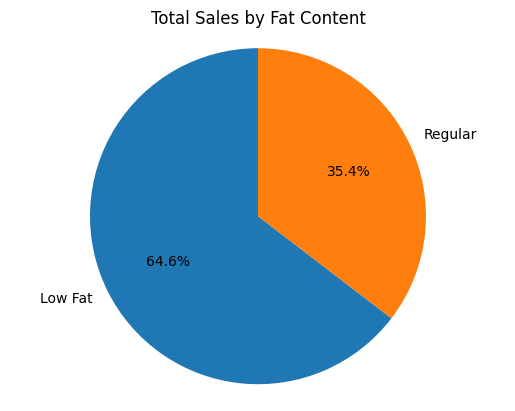

In [14]:
import matplotlib.pyplot as plt
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat_content, labels=sales_by_fat_content.index, autopct='%1.1f%%', startangle = 90)
plt.title('Total Sales by Fat Content')
plt.axis('equal')
plt.show()

### Sales by Item Type

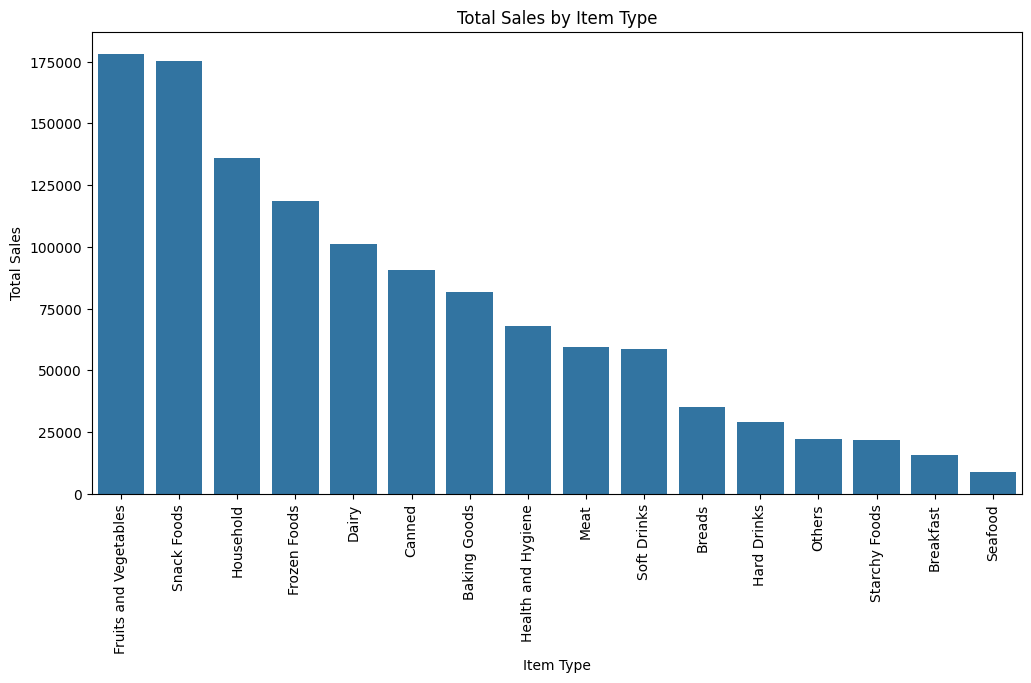

In [15]:
import seaborn as sns
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_item_type.index, y=sales_by_item_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.show()

### Item Visibility vs. Sales

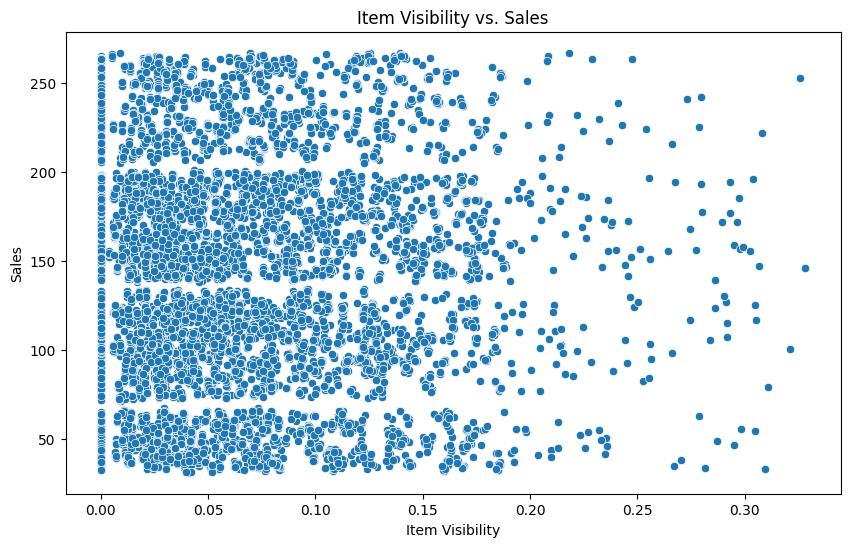

In [16]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Visibility', y='Sales', data=df)
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs. Sales')
plt.show()

### Sales by Outlet Type

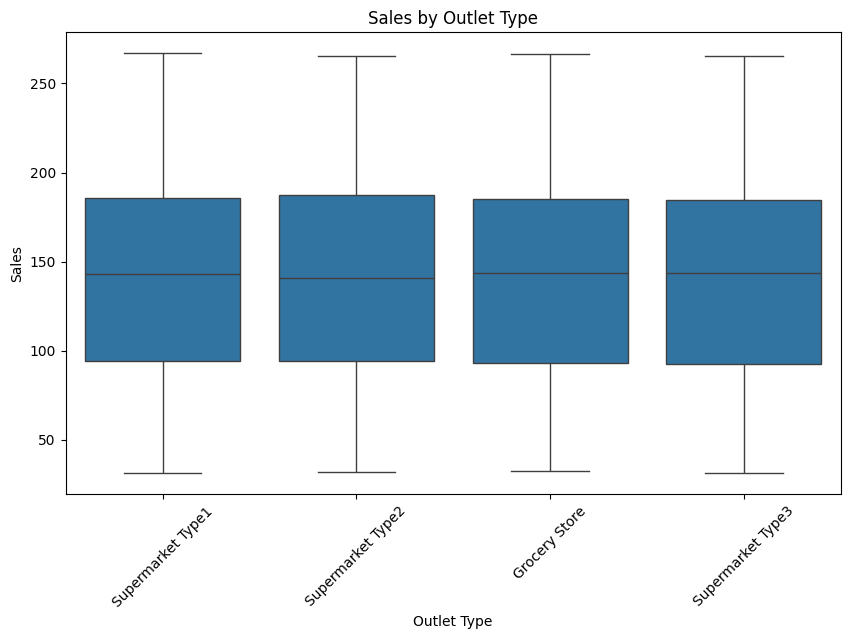

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet Type', y='Sales', data=df)
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Fill missing values in 'Item Weight' with the mean weight for each 'Item Type'
df['Item Weight'] = df['Item Weight'].fillna(df.groupby('Item Type')['Item Weight'].transform('mean'))

# Check if there are any missing values left
print(df['Item Weight'].isnull().sum())

0


In [19]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Create the 'Outlet Age' column
df['Outlet Age'] = current_year - df['Outlet Establishment Year']

# Display the first few rows with the new column
display(df[['Outlet Establishment Year', 'Outlet Age']].head())

,Outlet Establishment Year,Outlet Age
0,2012,13
1,2022,3
2,2010,15
3,2000,25
4,2015,10


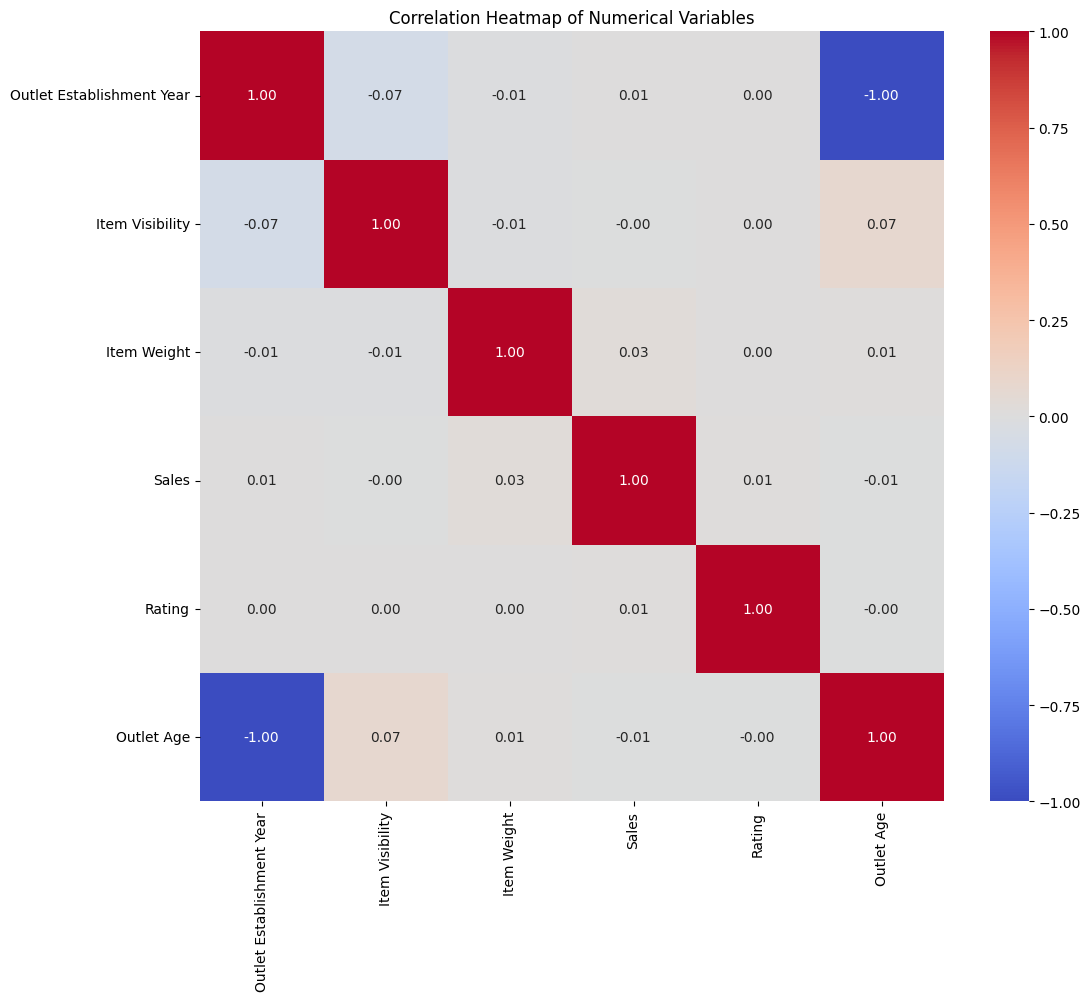

In [20]:
# Select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

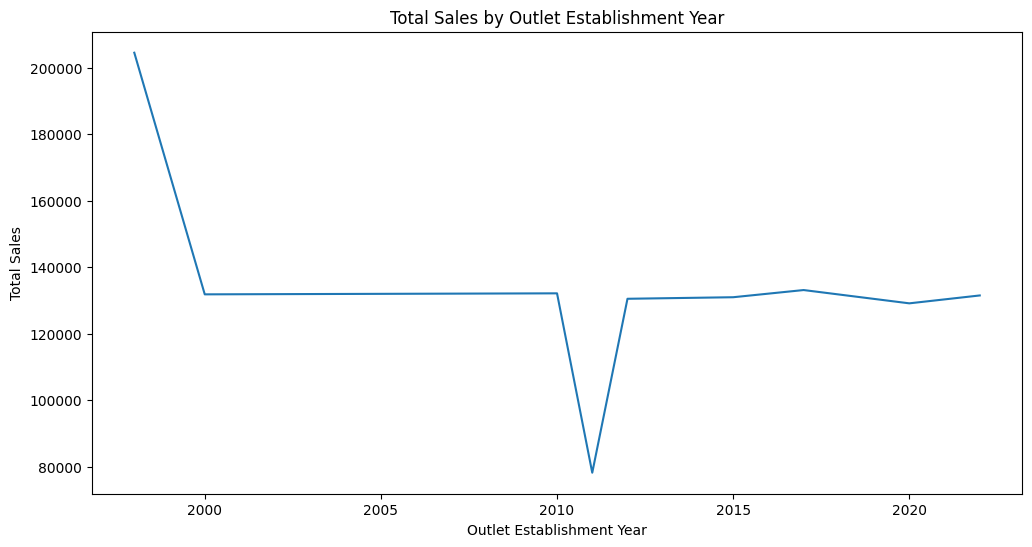

In [21]:
# Group sales by outlet establishment year and calculate the total sales for each year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')
plt.show()

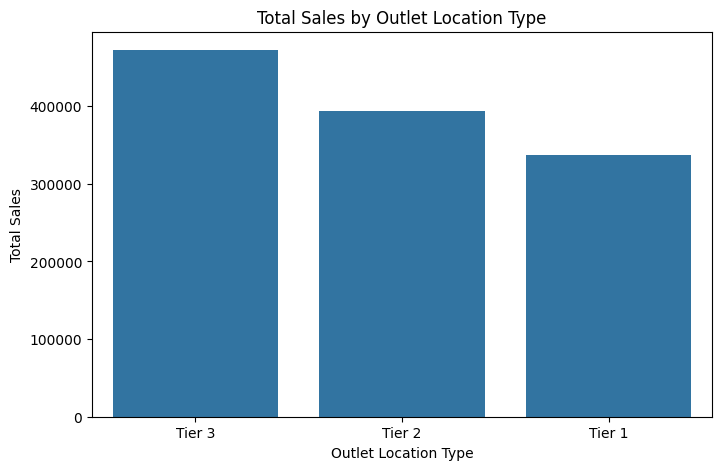

In [22]:
# Group sales by outlet location type and calculate the total sales
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_location.index, y=sales_by_location.values)
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location Type')
plt.show()

### Introduction

This notebook performs an in-depth analysis of the Blinkit sales dataset. The goal is to uncover insights into sales patterns and identify factors that influence sales performance. The analysis covers data cleaning, exploratory data analysis, feature engineering, and visualization of key metrics.

### Data Loading and Initial Exploration

We begin by loading the dataset and performing an initial exploration to understand its structure, data types, and basic statistics. This step is crucial for getting a first look at the data we are working with.

### Data Cleaning: Standardizing 'Item Fat Content'

In the 'Item Fat Content' column, we observed inconsistent values such as 'low fat', 'LF', and 'reg'. To ensure consistency, we are standardizing these values to 'Low Fat' and 'Regular'. This is a critical step for accurate analysis and visualization.

### Key Performance Indicators (KPIs)

Here we calculate some of the most important KPIs to get a high-level understanding of the business performance. These metrics include:
*   **Total Sales:** The total revenue generated.
*   **Average Sales:** The average sales value per transaction.
*   **Total Items Sold:** The total number of items sold.
*   **Average Rating:** The average customer rating for the items.

### Exploratory Data Analysis (EDA) through Visualizations

In this section, we use various charts and plots to visualize the data and uncover patterns, relationships, and anomalies.

#### Insights from Sales by Fat Content

The pie chart shows the distribution of total sales based on the fat content of the items. This helps us understand which category contributes more to the sales. We can see that 'Low Fat' items contribute to a significantly larger portion of the sales compared to 'Regular' fat items.

#### Insights from Sales by Item Type

This bar chart displays the total sales for each item type. It is sorted in descending order to easily identify the top-selling categories. 'Fruits and Vegetables' and 'Snack Foods' are the highest-selling item types, while 'Seafood' and 'Breakfast' items have the lowest sales.

#### Insights from Item Visibility vs. Sales

This scatter plot helps us understand the relationship between an item's visibility in the store and its sales. While there is no strong linear correlation, we can observe that items with higher visibility do not necessarily translate to higher sales. Interestingly, many items with very low visibility have high sales, which might indicate that these are popular items that customers actively seek out.

#### Insights from Sales by Outlet Type

The box plot compares the distribution of sales across different types of outlets. 'Supermarket Type3' appears to have the highest median sales and a wider range of sales values, indicating higher sales performance compared to other outlet types. 'Grocery Store' has the lowest sales.

### Data Preprocessing and Feature Engineering

Before we proceed to more advanced analysis, we need to preprocess the data by handling missing values and creating new features that can provide more insights.

#### Handling Missing Values in 'Item Weight'

There are missing values in the 'Item Weight' column. We are filling these missing values with the mean weight of the corresponding 'Item Type'. This is a reasonable approach to impute the missing data without losing valuable information.

#### Feature Engineering: Creating 'Outlet Age'

We are creating a new feature called 'Outlet Age' by subtracting the 'Outlet Establishment Year' from the current year. This will allow us to analyze if the age of an outlet has any impact on its sales performance.

### Advanced Analysis

Now, we will perform more advanced analysis to uncover deeper insights from the data.

#### Correlation Heatmap

The correlation heatmap visualizes the strength of the linear relationship between the numerical variables in our dataset. The color intensity and the values in the cells indicate the correlation coefficient. We can observe that there are no strong correlations between 'Sales' and other numerical features like 'Item Weight' or 'Item Visibility'. 'Outlet Age' and 'Outlet Establishment Year' are perfectly negatively correlated, as expected.

#### Total Sales by Outlet Establishment Year

This line plot shows the trend of total sales over the years based on the outlet establishment year. This can help us understand if older or newer outlets are performing better. The plot shows some fluctuations in sales over the years, with a notable peak for outlets established in 1998.

#### Total Sales by Outlet Location Type

This bar chart compares the total sales across different outlet location types ('Tier 1', 'Tier 2', 'Tier 3'). It clearly shows that 'Tier 3' locations generate the highest total sales, followed by 'Tier 2' and 'Tier 1'. This suggests that the location of the outlet is a very important factor in determining sales.

### Conclusion

This analysis of the Blinkit sales data has provided several key insights:

*   **Product Insights:** 'Low Fat' products and categories like 'Fruits and Vegetables' and 'Snack Foods' are major drivers of sales.
*   **Outlet Performance:** 'Supermarket Type3' outlets and those located in 'Tier 3' areas are the top performers in terms of sales.
*   **Customer Behavior:** Item visibility does not seem to be a primary driver of sales, suggesting that customers may be seeking out specific products they are already familiar with.
*   **Data Quality:** The initial dataset had inconsistencies and missing values that were addressed through data cleaning and preprocessing to ensure the reliability of our analysis.

These findings can be used by Blinkit to make data-driven decisions to optimize their product assortment, marketing strategies, and outlet management to boost sales and improve overall business performance.